In [52]:
import pickle
import torch
import dill
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from pyloric import summary_stats, simulate, create_prior
from paper.pyloric_utils import compare_voltage_low_and_high_energy_trace
from sbi.analysis import pairplot
from sbi.utils.posterior_ensemble import NeuralPosteriorEnsemble

# Panel a

In [4]:
npz = np.load('../../results/trace_data_845_082_0044.npz')
t = npz['t']
PD_spikes = npz['PD_spikes']
LP_spikes = npz['LP_spikes']
PY_spikes = npz['PY_spikes']
pdn = npz['pdn']
lpn = npz['lpn']
pyn = npz['pyn']

In [5]:
start_index = 219500 + 2100
end_index   = 246500 + 2100  # 32000
height_offset = 200
shown_t = t[end_index] - t[start_index]
time_len = shown_t / 0.025 * 1000
dt = t[1] - t[0]

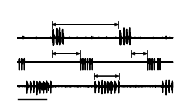

In [7]:
with mpl.rc_context(fname='../../.matplotlibrc'):
    fig, ax = plt.subplots(1,1,figsize=(2.2, 1.2)) # (2.87, 2.08*3/4)
    ax.plot(t[start_index:end_index], 2.5+pdn[start_index:end_index]*0.007, c="k", lw=0.8)
    ax.plot(t[start_index:end_index], 1.2+lpn[start_index:end_index]*0.25, c="k", lw=0.8)
    ax.plot(t[start_index:end_index], -0.1+pyn[start_index:end_index]*0.013, c="k", lw=0.8)
    
    linew = 0.4
    headl = 0.06
    headw = 0.16
    linelen = 0.17
    circlefact = 0.8
    
    # period arrow
    height1 = 3.2
    plt.arrow(t[start_index]+0.6, height1, 1.15, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.arrow(t[start_index]+1.75, height1, -1.15, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.plot([t[start_index]+0.6, t[start_index]+0.6], [height1-linelen,height1+linelen], c='k', lw=linew*1.5)
    plt.plot([t[start_index]+1.75, t[start_index]+1.75], [height1-linelen,height1+linelen], c='k', lw=linew*1.5)
    #patch =mp.Ellipse((t[start_index]+1.2, 3.65), 0.2*circlefact,0.6*circlefact, color='lightgray')
    #ax.add_patch(patch)
    
    # delay arrow
    height2 = 1.64
    plt.arrow(t[start_index]+0.6, height2, 0.48, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.arrow(t[start_index]+1.08, height2, -0.48, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.plot([t[start_index]+0.6, t[start_index]+0.6], [height2-linelen,height2+linelen], c='k', lw=linew*1.5)
    plt.plot([t[start_index]+1.08, t[start_index]+1.08], [height2-linelen,height2+linelen], c='k', lw=linew*1.5)
    #patch =mp.Ellipse((t[start_index]+0.94, 2.1), 0.2*circlefact,0.6*circlefact, color='lightgray')
    #ax.add_patch(patch)
    
    # gap arrow
    plt.arrow(t[start_index]+1.98, height2, 0.27, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.arrow(t[start_index]+2.25, height2, -0.27, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.plot([t[start_index]+1.98, t[start_index]+1.98], [height2-linelen,height2+linelen], c='k', lw=linew*1.5)
    plt.plot([t[start_index]+2.25, t[start_index]+2.25], [height2-linelen,height2+linelen], c='k', lw=linew*1.5)
    #patch =mp.Ellipse((t[start_index]+2.1, 2.1), 0.2*circlefact,0.6*circlefact, color='lightgray')
    #ax.add_patch(patch)
    
    # duration arrow
    height4 = 0.44
    plt.arrow(t[start_index]+1.33, height4, 0.43, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.arrow(t[start_index]+1.76, height4, -0.43, 0,  shape='full', head_width=headw, head_length=headl, length_includes_head=True, color='k', lw=linew)
    plt.plot([t[start_index]+1.33, t[start_index]+1.33], [height4-linelen,height4+linelen], c='k', lw=linew*1.5)
    plt.plot([t[start_index]+1.76, t[start_index]+1.76], [height4-linelen,height4+linelen], c='k', lw=linew*1.5)
    #patch =mp.Ellipse((t[start_index]+1.55, 0.9), radius=0.2, color='lightgray')
    #ax.add_patch(patch)
    

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.axes.get_yaxis().set_ticks([])
    ax.axes.get_xaxis().set_ticks([])
    ax.get_yaxis().set_visible(False)
    ax.set_ylim([-0.95, 4.0])
    
    duration = 0.5
    number_of_timesteps = int(duration / dt)
    t_scale = np.linspace(t[start_index], t[start_index + number_of_timesteps], 2)
    
    ax.plot(t_scale, -0.8 * np.ones_like(t_scale), c='k', lw=1.0)
    plt.savefig("../svg/panel_a.svg")
    plt.show()

# Panel B

In [48]:
with open("/home/michael/Documents/tsnpe_collection/paper/results/pyloric_restricted_prior.pkl", "rb") as handle:
    classifier = pickle.load(handle)

In [125]:
theta_prior = classifier.sample((100000,))

The classifier rejected 88.6% of all samples. You will get a speed-up of 775.1%.


In [126]:
prior = create_prior()

In [127]:
lower = prior.numerical_prior.support.base_constraint.lower_bound
upper = prior.numerical_prior.support.base_constraint.upper_bound
limits = torch.stack([lower, upper]).T

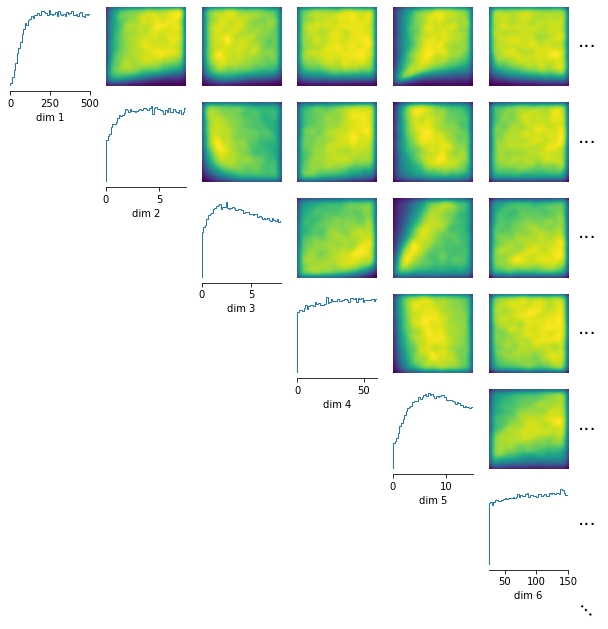

In [128]:
_ = pairplot(theta_prior, subset=[0, 1, 2, 3, 4, 5], limits=limits, upper="kde")

In [139]:
from sbi.analysis import marginal_plot

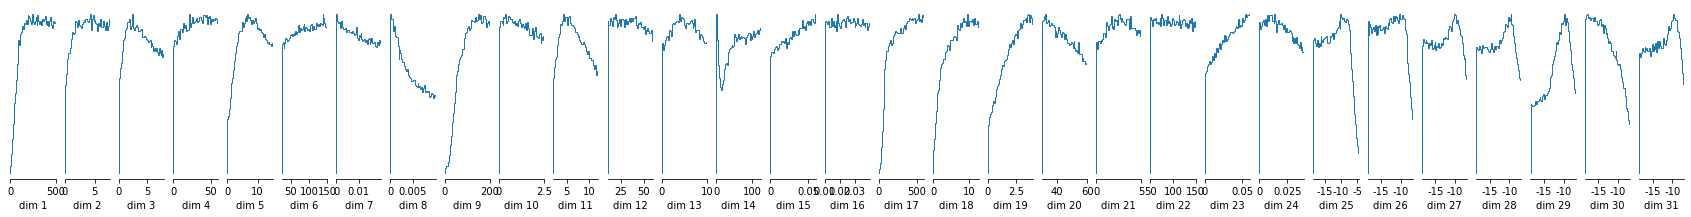

In [144]:
_ = marginal_plot(theta_prior, limits=limits, figsize=(30, 3))

In [136]:
dims= [24,25]
thetas = theta_prior[:, dims].numpy()
l = limits[dims, :]

In [137]:
hist_vals, _, _ = np.histogram2d(thetas[:, 0], thetas[:, 1], bins=40, range=l)

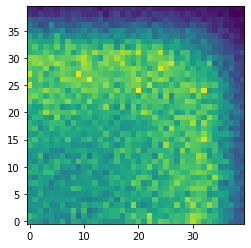

In [138]:
plt.imshow(hist_vals, origin="lower")

# Panel C

In [20]:
prior = create_prior()
s = prior.sample((1,))
names = s.columns

In [14]:
def load_pyloric_posterior_from_file(round_):
    path = f"/home/michael/Documents/tsnpe_collection/paper/results/pyloric_inference_r{round_}.pkl"
    with open(path, "rb") as handle:
        inferences = dill.load(handle)
    xo = torch.as_tensor(
        [
            1.17085859e03,
            2.06036434e02,
            2.14307031e02,
            4.12842187e02,
            1.75970382e-01,
            1.83034085e-01,
            3.52597820e-01,
            4.11600328e-01,
            6.30544893e-01,
            4.81925781e02,
            2.56353125e02,
            2.75164844e02,
            4.20460938e01,
            2.35011166e-01,
            3.59104797e-02,
            2.5,
            2.5,
            2.5,
        ]
    )
    xo = xo.unsqueeze(0)
    posteriors = [infer.build_posterior() for infer in inferences]
    ensemble_post = NeuralPosteriorEnsemble(posteriors=posteriors).set_default_x(xo)
    return ensemble_post, inferences

In [17]:
posterior, _ = load_pyloric_posterior_from_file(21)

The classifier rejected 88.8% of all samples. You will get a speed-up of 792.2%.
The classifier rejected 89.1% of all samples. You will get a speed-up of 816.8%.


In [23]:
theta = posterior.sample((2,))
sorted_params_pd = pd.DataFrame(theta, columns=names)

In [25]:
all_out_targets = []
summstats = []
for counter in range(2):
    out_target = simulate(sorted_params_pd.loc[counter], seed=0)
    summstats.append(summary_stats(out_target))
    all_out_targets.append(out_target)

In [26]:
time_vec = np.arange(0, 11000, 0.025)

Showing :   3.0 seconds
Scalebar indicates:  50mV


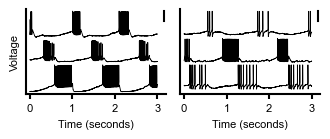

In [33]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    compare_voltage_low_and_high_energy_trace(
        all_out_targets,
        time_vec,
        figsize=(3.8, 1.1),
    )
    plt.show()

In [35]:
path = "../../results/pyloric_net_sims/prior_predictives.pkl"
x_prior = pd.read_pickle(path)
x_prior_np = x_prior.to_numpy()

stats_mean = np.mean(x_prior_np, axis=0)
stats_std = np.std(x_prior_np, axis=0)

In [36]:
path = "../../results/pyloric_net_sims/posterior_energy_paper_predictives.pkl"
posterior_predictives = pd.read_pickle(path)
posterior_predictives_np = posterior_predictives.to_numpy()

In [38]:
good_or_not = np.invert(np.any(np.isnan(posterior_predictives_np), axis=1))
good_percentage = np.sum(good_or_not) / posterior_predictives_np.shape[0] * 100
print("Overall percentage of NaNs", 100.-good_percentage, "%")

Overall percentage of NaNs 14.935784313725492 %


## Assemble figure

In [8]:
import time
import IPython.display as IPd

def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

In [45]:
from svgutils.compose import *

# > Inkscape pixel is 1/90 of an inch, other software usually uses 1/72.
# > http://www.inkscapeforum.com/viewtopic.php?f=6&t=5964
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise
factor_svg=5.5

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '12pt', 'font': 'Arial', 'weight': '800'}
kwargs_consistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_consistent1 = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#9E7DD5'}
kwargs_inconsistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_text8pt = {'size': '7.7pt', 'font': 'Arial'}

sizefactor = 1.0

f = Figure("20.3cm", "2.9cm",
    Panel(
          SVG("../svg/panel_a.svg").scale(svg_scale),
          Text("a", 3.7, 7, **kwargs_text),
          Text("Experimental data", 48.7, 7, **kwargs_text8pt),
    ).move(-3.7, 5),
)

!mkdir -p fig
f.save("../fig/fig7.svg")
svg('../fig/fig7.svg')

### Simulate posterior predictives TSNPE

In [54]:
theta = posterior.sample((300,))
sorted_params_pd = pd.DataFrame(theta, columns=names)

Drawing 300 posterior samples:   0%|          | 0/300 [00:00<?, ?it/s]

In [55]:
all_out_targets = []
summstats = []
for counter in range(300):
    out_target = simulate(sorted_params_pd.loc[counter])
    summstats.append(summary_stats(out_target))
    all_out_targets.append(out_target)

In [48]:
tsnpe_stats = pd.concat(summstats)
tsnpe_stats_np = tsnpe_stats.to_numpy()

In [50]:
tsnpe_stats_np.shape

(200, 15)

In [49]:
good_or_not = np.invert(np.any(np.isnan(tsnpe_stats_np), axis=1))
good_percentage = np.sum(good_or_not) / tsnpe_stats_np.shape[0] * 100
print("Overall percentage of NaNs", 100.-good_percentage, "%")

Overall percentage of NaNs 22.0 %


In [39]:
# names = []
# for num in range(15):
#     names.append(get_summ_stat_name_text(num))

In [ ]:
import seaborn as sns
import pandas as pd

with mpl.rc_context(fname='../../../.matplotlibrc'):
    fig, ax = plt.subplots(1,1, figsize=(3.5*1.35, 1.3))
    plt.scatter(np.arange(15)+0.4, norm_gt, marker='x', s=15.0, color=col['GT'])
    df = pd.DataFrame(ss_norm)

    box = sns.boxplot(data=df, width=0.4, fliersize=.0, linewidth=1.2) # , color='#0570b0'
    for i, patch in enumerate(box.artists):
        r, g, b, a = patch.get_facecolor() # r, g, b, a = patch.get_facecolor()
        patch.set_facecolor(col['CONSISTENT2']) # patch.set_facecolor((r, g, b, .6))
        patch.set_edgecolor(col['CONSISTENT2'])
        for j in range(i*6,i*6+6):
            line = ax.lines[j]
            line.set_color(col['CONSISTENT1'])
            line.set_mfc(col['CONSISTENT1'])
            line.set_mec(col['CONSISTENT1'])

    ax.set_ylim([-2,2])
    ax.set_xlim([-0.5,14.7])
    ax.set_xticklabels(names, rotation='vertical')
    ax.set_yticks([-2, 0, 2])
    ax.set_yticklabels(['$\mathdefault{-2}\sigma$', '0', '2$\sigma$'])
    ax.text(0.336,  -0.68, 'Summary features', transform=ax.transAxes)
    ax.text(0.322, -0.80, '[st. dev. of samples]', transform=ax.transAxes)
    #plt.savefig('../results/energy/classifier/figs/summstats.png', dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
# differences
sd_sbi = (norm_gt - ss_norm[good_or_not])**2
sd_delfi = (norm_gt - norm_stats_maf)**2

In [ ]:
summed_square_diff_sbi = np.median(sd_sbi, axis=0)
summed_square_diff_delfi = np.median(sd_delfi, axis=0)

In [ ]:
with mpl.rc_context(fname='../../../.matplotlibrc'):
    fig, ax = plt.subplots(1, 1, figsize=(4.0, 1.))
    ax.bar(np.arange(15)-0.3, summed_square_diff_delfi, width=0.2, color='#2b8cbe', label='previous')
    ax.bar(np.arange(15), summed_square_diff_sbi, width=0.2, color='#e34a33', label='ours')
    ax.set_ylim([0, 0.008])
    ax.set_xticks(np.arange(15))
    ax.set_xticklabels(names, rotation='vertical')
    ax.set_xlim([-0.5,14.7])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.legend()

    ax.set_ylabel('Median sq. error')
    ax.set_xlabel('Summary features')

    plt.savefig(PANEL_A, facecolor='None', transparent=True)
    plt.show()

In [ ]:
with mpl.rc_context(fname='../../../.matplotlibrc'):
    fig, ax = plt.subplots(1, 1, figsize=(4.0, 1.))
    ax.bar(np.arange(15), (summed_square_diff_delfi - summed_square_diff_sbi) / summed_square_diff_delfi * 100, width=0.2, color='#636363')
    ax.set_ylim([0, 50])
    ax.set_xticks(np.arange(15))
    ax.set_xticklabels(names, rotation='vertical')
    ax.set_xlim([-0.5, 14.7])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #ax.axhline(1.0, linestyle='--', c='grey')

    ax.set_ylabel('Error reduction\nin %')
    ax.set_xlabel('Summary features')

    plt.savefig(PANEL_B, facecolor='None', transparent=True)
    plt.show()